In [ ]:
#Nomes: Renato Borges Gallo Junior e Valdir Evaristo da Silva Junior
#Curso: Estrutura de dados 3º semestre 12/2020

In [ ]:
#Analise de candidatos a vereador do genero feminino sem nenhum voto da cidade de São José dos Campos na eleição de 2020
# Dados retirados de : https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais

In [1]:
import pandas as pd
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [ ]:
#Incluindo dados das votações do estado de SP

In [102]:
df = pd.read_csv('votacao_candidato_munzona_2020_SP.csv', sep=';', encoding='latin1')

In [ ]:
#Filtrando apenas o primeiro turno

In [103]:
df_1o_turno = df[df['NR_TURNO'] == 1]

In [ ]:
#Filtrando apenas dados referente a cidade de São José dos Campos

In [104]:
df_dados_sjc = df_1o_turno[df_1o_turno['NM_MUNICIPIO'] == 'SÃO JOSÉ DOS CAMPOS']

In [ ]:
#Filtrando colunas com dados (Nome do municipio, nome do candidato, quantidade de votos e código do candidato)

In [105]:
df_dados_sjc = df_dados_sjc[['NM_MUNICIPIO', 'NM_CANDIDATO', 'QT_VOTOS_NOMINAIS', 'SQ_CANDIDATO']]

In [106]:
df_dados_sjc = df_dados_sjc.groupby(['NM_MUNICIPIO', 'NM_CANDIDATO']).sum().reset_index()

In [ ]:
#Incluindo dados dos candidatos do estado de SP

In [107]:
df2 = pd.read_csv('consulta_cand_2020_SP.csv',encoding='latin-1',sep=';')

In [ ]:
#Analisando os códigos referente a cargos de candidatos de 2020, valor 13 é referente a vereador e ao lado está a quantidade

In [108]:
df2['CD_CARGO'].value_counts()

13    87334
12     2655
11     2646
Name: CD_CARGO, dtype: int64

In [ ]:
#Criamos as variaveis "vereadora" :

In [109]:
vereadora= df2[(df2['CD_CARGO']==13)]

In [ ]:
#Filtrando colunas com dados (Sigla do partido, genero do candidato, Grau de instrução do candidato
#nome do candidato, nome da cidade e codigo do candidato)

In [110]:
vereadora = vereadora[['SG_PARTIDO', 'DS_GENERO', 'DS_GRAU_INSTRUCAO', 'NM_CANDIDATO', 'NM_UE', 'SQ_CANDIDATO']]

In [ ]:
#Filtrando apenas dados referente a cidade de São José dos Campos

In [111]:
vereadora = vereadora[vereadora['NM_UE'] == 'SÃO JOSÉ DOS CAMPOS']

In [ ]:
#Filtrando apenas dados referente a candidatos do genero feminino

In [112]:
vereadora = vereadora[vereadora['DS_GENERO'] == 'FEMININO'].reset_index()

In [ ]:
#Nas próximas duas linhas retiramos candidatos com códigos duplicados:

In [113]:
vereadora['SQ_CANDIDATO'].drop_duplicates()

0      250000643185
1      250000693469
2      250000897742
3      250000647377
4      250000679882
           ...     
189    250000685291
190    250001178792
191    250001044560
192    250000809141
193    250000895681
Name: SQ_CANDIDATO, Length: 194, dtype: int64

In [114]:
df_dados_sjc['SQ_CANDIDATO'].drop_duplicates()

0      1000002775084
1      1000002741144
2      1000004715192
3      1000004631476
4      1000002572692
           ...      
597    1000003514412
598    1000002551808
599    1000003582712
600    1000003590944
601    1000002773844
Name: SQ_CANDIDATO, Length: 602, dtype: int64

In [23]:
#Realizamos a junção dos arquivos referente a dados e votos dos candidados :

In [115]:
dados2020 = pd.merge(vereadora,
                    df_dados_sjc[['NM_CANDIDATO','QT_VOTOS_NOMINAIS']],
                    on='NM_CANDIDATO')

In [ ]:
#Filtrando apenas candidatos com votos = 0

In [116]:
dados2020 = dados2020.query('QT_VOTOS_NOMINAIS == "0"')

In [ ]:
#Contando quantos candidatos de São José dos Campos tiveram zero votos

In [117]:
dados2020[('DS_GENERO')].count()

9

In [ ]:
#O próximo grafico nos tras os partidos dos candidatos:

<AxesSubplot:ylabel='SG_PARTIDO'>

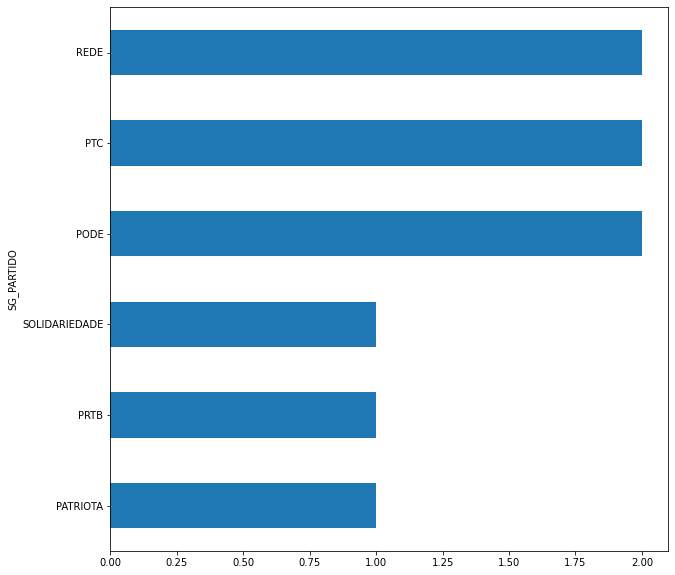

In [118]:
dados2020.groupby(['SG_PARTIDO'])['SG_PARTIDO'].count().sort_values().tail(20).plot(kind='barh', figsize=(10,10))

In [ ]:
#O próximo grafico nos tras o grau de escolaridade dos candidatos:

<AxesSubplot:ylabel='DS_GRAU_INSTRUCAO'>

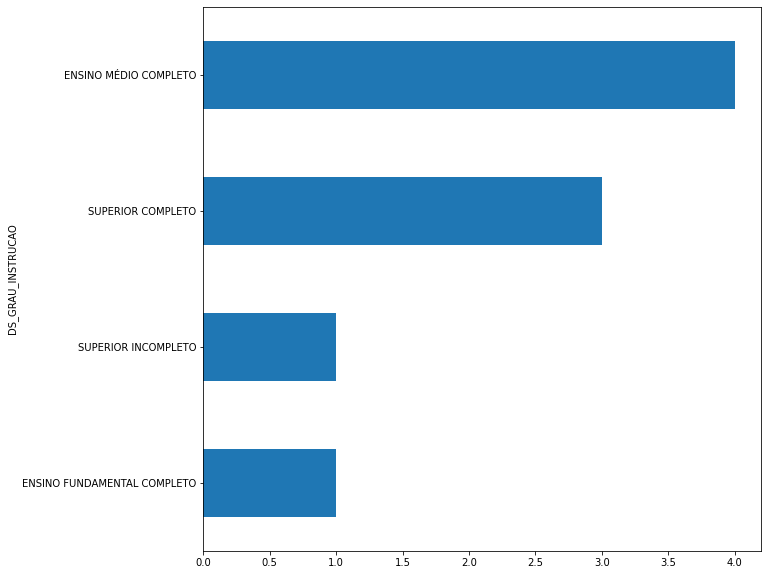

In [119]:
dados2020.groupby(['DS_GRAU_INSTRUCAO'])['DS_GRAU_INSTRUCAO'].count().sort_values().tail(20).plot(kind='barh', figsize=(10,10))

In [ ]:
#O próximo grafico nos tras os nomes dos candidatos:

<AxesSubplot:ylabel='NM_CANDIDATO'>

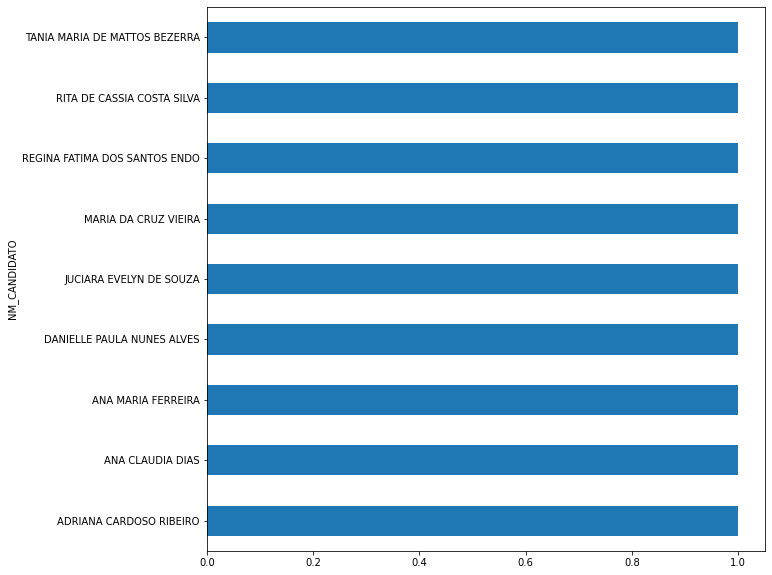

In [120]:
dados2020.groupby(['NM_CANDIDATO'])['NM_CANDIDATO'].count().sort_values().tail(20).plot(kind='barh', figsize=(10,10))